In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# Scale class variables
from sklearn.preprocessing import LabelEncoder

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

In [2]:
#import the dataset
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)

In [3]:
#visualize the first records of the dataset
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#General description of the dataset
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
#Data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#save a new df to modify
dfM = df.copy()

In [7]:
#add a column with '0' if 'Global Sales' are lower that 1 million or '1' if are higher
dfM['Exito'] = pd.cut(x=dfM['Global_Sales'], bins=[0, 0.99,100], labels=['0', '1'])

In [8]:
#visualize the first records of the modified dataset
dfM.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Exito
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
#remove the columns that are not required
dfM = dfM.drop(['Name', 'Year_of_Release','Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)

In [10]:
#change datatype to 'str' ('string')
dfM['Platform'] = dfM['Platform'].astype('str')
dfM['Genre'] = dfM['Genre'].astype('str')
dfM['Publisher'] = dfM['Publisher'].astype('str')
dfM['Developer'] = dfM['Developer'].astype('str')
dfM['Rating'] = dfM['Rating'].astype('str')

In [11]:
# Save the labels for the categorical variables
scalerPla = LabelEncoder().fit(dfM.Platform)
scalerGen = LabelEncoder().fit(dfM.Genre)
scalerPub = LabelEncoder().fit(dfM.Publisher)
scalerDev = LabelEncoder().fit(dfM.Developer)
scalerRat = LabelEncoder().fit(dfM.Rating)

In [12]:
# Show the list of original values and encoded values for: Platform
pd.DataFrame({
    "original": list(scalerPla.classes_),
    "codificada": list(scalerPla.transform(scalerPla.classes_))
})

,original,codificada
0,2600,0
1,3DO,1
2,3DS,2
3,DC,3
4,DS,4
5,GB,5
6,GBA,6
7,GC,7
8,GEN,8
9,GG,9


In [13]:
# Show the list of original values and encoded values for: Genre
pd.DataFrame({
    "original": list(scalerGen.classes_),
    "codificada": list(scalerGen.transform(scalerGen.classes_))
})

,original,codificada
0,Action,0
1,Adventure,1
2,Fighting,2
3,Misc,3
4,Platform,4
5,Puzzle,5
6,Racing,6
7,Role-Playing,7
8,Shooter,8
9,Simulation,9


In [14]:
# Show the list of original values and encoded values for: Publisher
pd.DataFrame({
    "original": list(scalerPub.classes_),
    "codificada": list(scalerPub.transform(scalerPub.classes_))
})

,original,codificada
0,10TACLE Studios,0
1,1C Company,1
2,20th Century Fox Video Games,2
3,2D Boy,3
4,3DO,4
5,49Games,5
6,505 Games,6
7,5pb,7
8,7G//AMES,8
9,989 Sports,9


In [15]:
# Show the list of original values and encoded values for: Developer
pd.DataFrame({
    "original": list(scalerDev.classes_),
    "codificada": list(scalerDev.transform(scalerDev.classes_))
})

,original,codificada
0,10tacle Studios,0
1,"10tacle Studios, Fusionsphere Systems",1
2,"1C, 1C Company",2
3,"1C, Ino-Co, 1C Company",3
4,"1C, Various, 1C Company",4
5,1C: Maddox Games,5
6,1C:Ino-Co,6
7,1st Playable Productions,7
8,2015,8
9,2D Boy,9


In [16]:
# Show the list of original values and encoded values for: Rating
pd.DataFrame({
    "original": list(scalerRat.classes_),
    "codificada": list(scalerRat.transform(scalerRat.classes_))
})

,original,codificada
0,AO,0
1,E,1
2,E10+,2
3,EC,3
4,K-A,4
5,M,5
6,RP,6
7,T,7
8,nan,8


In [17]:
# Transform the categorical variables with the scale previously defined
dfM.Platform = scalerPla.transform(dfM.Platform)
dfM.Genre = scalerGen.transform(dfM.Genre)
dfM.Publisher = scalerPub.transform(dfM.Publisher)
dfM.Developer = scalerDev.transform(dfM.Developer)
dfM.Rating = scalerRat.transform(dfM.Rating)

In [18]:
#change datatype to numeric
dfM['User_Score'] = pd.to_numeric(dfM['User_Score'], errors='coerce')

In [19]:
#remove rows that have at least one column with NA
dfM = dfM.dropna()

In [20]:
#General description of modified the dataset
dfM.describe()

,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,17.906228,5.099473,296.811885,70.249822,28.783241,7.182428,173.432664,848.789654,4.107311
std,8.091730,3.821013,183.064915,13.880646,19.167119,1.441241,581.977516,490.162635,2.592315
min,2.000000,0.000000,0.000000,13.000000,3.000000,0.500000,4.000000,1.000000,0.000000
25%,13.000000,1.000000,139.000000,62.000000,14.000000,6.500000,11.000000,431.000000,1.000000
50%,17.000000,6.000000,325.000000,72.000000,24.000000,7.500000,27.000000,821.000000,5.000000
75%,26.000000,8.000000,468.000000,80.000000,39.000000,8.200000,89.000000,1289.000000,7.000000
max,30.000000,11.000000,580.000000,98.000000,113.000000,9.600000,10665.000000,1696.000000,8.000000


In [21]:
#visualize the first records of the modified dataset
dfM.head()

,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Exito
0,26,10,361,76.0,51.0,8.0,322.0,1020,1,1
2,26,6,361,82.0,73.0,8.3,709.0,1020,1,1
3,26,10,361,80.0,73.0,8.0,192.0,1020,1,1
6,4,4,361,89.0,65.0,8.5,431.0,1020,1,1
7,26,3,361,58.0,41.0,6.6,129.0,1020,1,1


In [22]:
#Data types of the modified dataset
dfM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017 entries, 0 to 16709
Data columns (total 10 columns):
Platform        7017 non-null int32
Genre           7017 non-null int32
Publisher       7017 non-null int32
Critic_Score    7017 non-null float64
Critic_Count    7017 non-null float64
User_Score      7017 non-null float64
User_Count      7017 non-null float64
Developer       7017 non-null int32
Rating          7017 non-null int32
Exito           7017 non-null category
dtypes: category(1), float64(4), int32(5)
memory usage: 418.1 KB


In [23]:
#change data type of categorical variables
dfM['Platform'] = dfM['Platform'].astype('category')
dfM['Genre'] = dfM['Genre'].astype('category')
dfM['Publisher'] = dfM['Publisher'].astype('category')
dfM['Developer'] = dfM['Developer'].astype('category')
dfM['Rating'] = dfM['Rating'].astype('category')
dfM['Exito'] = dfM['Exito'].astype('category')

In [24]:
#Data types of the modified dataset
dfM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017 entries, 0 to 16709
Data columns (total 10 columns):
Platform        7017 non-null category
Genre           7017 non-null category
Publisher       7017 non-null category
Critic_Score    7017 non-null float64
Critic_Count    7017 non-null float64
User_Score      7017 non-null float64
User_Count      7017 non-null float64
Developer       7017 non-null category
Rating          7017 non-null category
Exito           7017 non-null category
dtypes: category(6), float64(4)
memory usage: 392.9 KB


In [25]:
# 1. Select the features

features = dfM.drop('Exito', 1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,Platform,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,26,10,361,76.0,51.0,8.0,322.0,1020,1
2,26,6,361,82.0,73.0,8.3,709.0,1020,1
3,26,10,361,80.0,73.0,8.0,192.0,1020,1
6,4,4,361,89.0,65.0,8.5,431.0,1020,1
7,26,3,361,58.0,41.0,6.6,129.0,1020,1


In [26]:
# 2. Select the Dependent Variable

depVar = dfM['Exito']
depVar.head()

0    1
2    1
3    1
6    1
7    1
Name: Exito, dtype: category
Categories (2, object): [0 < 1]

In [27]:
# 3. Split our data
# Test size = 20%
# X: Predictors / y: Dependent variable
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          depVar,
                                                          test_size=0.2,
                                                          random_state=42)

In [28]:
#Check Cross Validation
print('Predictors shape:')
print(X_train.shape, X_test.shape)

print('Dependent variable shape:')
print(y_train.shape, y_test.shape)

Predictors shape:
(5613, 9) (1404, 9)
Dependent variable shape:
(5613,) (1404,)


In [29]:
# 4. Establish variables that you will use for defining each model
# Models: Logistic Regression, Random Forest, Support Vector Machine,
# Gradient Boosting Machine, K-Nearest Neighbors, Gaussian Naive Bayes 

modelLR = LogisticRegression()
modelRF =RandomForestClassifier()
modelSVC = SVC()
modelGBC = GradientBoostingClassifier()
modelKNC = KNeighborsClassifier()
modelGNB = GaussianNB()

In [30]:
# 5.1.1. Train "Logistic Regression" model
trainLR = modelLR.fit(X_train,y_train)
trainLR

c:\users\acer main\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# 5.1.2. Predict LR model
predictsLR = modelLR.predict(X_test)

# Evaluate accuracy
print ('Accuracy score LR model:')
print(accuracy_score(y_test, predictsLR))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsLR, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsLR))
print()

print("Classification Report:")
print(classification_report(y_test, predictsLR))

Accuracy score LR model:
0.8198005698005698

F1 Score:
0.7818772204816066

Confusion Matrix:
[[1093   35]
 [ 218   58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1128
           1       0.62      0.21      0.31       276

    accuracy                           0.82      1404
   macro avg       0.73      0.59      0.61      1404
weighted avg       0.79      0.82      0.78      1404



In [32]:
# 5.2.1. Train "Random Forest" model
trainRF = modelRF.fit(X_train,y_train)
trainRF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# 5.2.2. Predict RF model
predictsRF = modelRF.predict(X_test)

# Evaluate accuracy
print ('Accuracy score RF model:')
print(accuracy_score(y_test, predictsRF))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsRF, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsRF))
print()

print("Classification Report:")
print(classification_report(y_test, predictsRF))

Accuracy score RF model:
0.8803418803418803

F1 Score:
0.8701882912409229

Confusion Matrix:
[[1092   36]
 [ 132  144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1128
           1       0.80      0.52      0.63       276

    accuracy                           0.88      1404
   macro avg       0.85      0.74      0.78      1404
weighted avg       0.87      0.88      0.87      1404



In [34]:
# 5.3.1. Train "Support Vector Classifier" model
trainSVC = modelSVC.fit(X_train,y_train)
trainSVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
# 5.3.2.  Predict SVC model
predictsSVC = modelSVC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score SVC model:')
print(accuracy_score(y_test, predictsSVC))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsSVC, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsSVC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsSVC))

Accuracy score SVC model:
0.8183760683760684

F1 Score:
0.7691515477190594

Confusion Matrix:
[[1107   21]
 [ 234   42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1128
           1       0.67      0.15      0.25       276

    accuracy                           0.82      1404
   macro avg       0.75      0.57      0.57      1404
weighted avg       0.79      0.82      0.77      1404



In [36]:
# 5.4.1. Train "Gradient Boosting Regressor" model
trainGBC = modelGBC.fit(X_train,y_train)
trainGBC

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
# 5.4.2. Predict GBR model
predictsGBC = modelGBC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score GBC model:')
print(accuracy_score(y_test, predictsGBC))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsGBC, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGBC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGBC))

Accuracy score GBC model:
0.8746438746438746

F1 Score:
0.8628556942116264

Confusion Matrix:
[[1092   36]
 [ 140  136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1128
           1       0.79      0.49      0.61       276

    accuracy                           0.87      1404
   macro avg       0.84      0.73      0.77      1404
weighted avg       0.87      0.87      0.86      1404



In [38]:
# 5.5.1. Train "K Neighbors Regressor" model
trainKNC = modelKNC.fit(X_train,y_train)
trainKNC

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
# 5.5.2. Predict KNR model
predictsKNC = modelKNC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score KNN model:')
print(accuracy_score(y_test, predictsKNC))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsKNC, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsKNC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsKNC))

Accuracy score KNN model:
0.8205128205128205

F1 Score:
0.8108762708245911

Confusion Matrix:
[[1035   93]
 [ 159  117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1128
           1       0.56      0.42      0.48       276

    accuracy                           0.82      1404
   macro avg       0.71      0.67      0.69      1404
weighted avg       0.81      0.82      0.81      1404



In [40]:
# 5.6.1. Train "Gaussian Naive Bayes" model
trainGNB = modelGNB.fit(X_train,y_train)
trainGNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
# 5.6.2. Predict GNB model
predictsGNB = modelGNB.predict(X_test)

# Evaluate accuracy
print ('Accuracy score GNB model:')
print(accuracy_score(y_test, predictsGNB))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsGNB, average='weighted'))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGNB))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGNB))

Accuracy score GNB model:
0.8198005698005698

F1 Score:
0.801347618657052

Confusion Matrix:
[[1057   71]
 [ 182   94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1128
           1       0.57      0.34      0.43       276

    accuracy                           0.82      1404
   macro avg       0.71      0.64      0.66      1404
weighted avg       0.80      0.82      0.80      1404



In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator =  modelRF, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [45]:
best_RF = rf_random.best_estimator_

In [47]:
# 5.5.2. Predict KNR model
predictsBestRF = best_RF.predict(X_test)

# Evaluate Accuracy
print ('Accuracy:')
print(accuracy_score(y_test, predictsBestRF))
print()

# Evaluate F1 Score
print("F1 Score:")
print(f1_score(y_test, predictsBestRF, average='weighted'))
print()

print ('Confusion Matrix:')
print(confusion_matrix(y_test, predictsBestRF))
print()

# Evaluate RMSE
print ('Classification Report:')
print(classification_report(y_test, predictsBestRF))
print()

Accuracy:
0.8817663817663818

F1 Score:
0.8732778143034554

Confusion Matrix:
[[1087   41]
 [ 125  151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1128
           1       0.79      0.55      0.65       276

    accuracy                           0.88      1404
   macro avg       0.84      0.76      0.79      1404
weighted avg       0.88      0.88      0.87      1404




AttributeError: module 'seaborn' has no attribute 'plt'

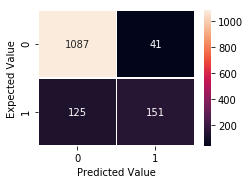

In [48]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(y_test, predictsBestRF), annot=True, 
            linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
sns.plt.title('Training Set Confusion Matrix')